# Videogame Sales Exploration

In this notebook, we will be exploring a dataset of videogame sales.  In particular, we will be generating charts with several different libraries to understand the relationship between different features in the dataset.

## Step 1: Loading the data

In this first step, we load the data into a `pandas` DataFrame.  This is a nice format for manipulating data.  If you are unfamiliar with it, you won't have to do any data manipulation in this assignment.  In fact, you do not have to change the code in Step 1 at all - just run the cell containing python code to load the data.

In [2]:
import pandas as pd
vg_data = pd.read_csv("data/vgsales.csv")

vg_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Step 2: Using `matplotlib` to compare North American Sales with Japanese Sales

North America and Japan have historically been the two most important markets for console videogame sales.  Different types of games do well in the two regions.  We are going to explore this data to try to understand the different markets over time.

First, we will provide a basic chart for you using `matplotlib`.

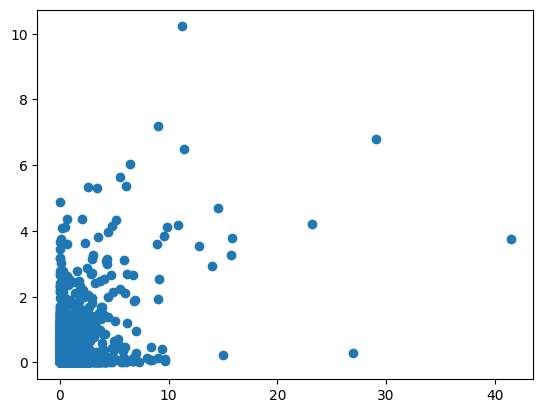

In [3]:
from matplotlib import pyplot as plt

plt.scatter(data=vg_data, x="NA_Sales", y="JP_Sales")

### Exercise 1

Improve the matplotlib plot above.  It needs some work.  There are no axis labels and no title.  It's also hard to figure anything out with so many points being painted over one another.  We might want to figure out if there is any trend between these two variables.  We also might want to see if there is any relationship with the platform.

**Take a screenshot after doing each of the prompts, and put them into a writeup document**.

1. First, look through the matplotlib documentation and figure out how to add an appropriate title for the plot, as well as an x-axis and y-axis labels.
2. Next, we want to deal with the overpainting problem.  There are two good strategies for this.  First, we can set each point to be semi-transparent.  Look through the matplotlib documentation to set the transparency of each point to a number less than 1 - 0.1 would do.  Next, change each pount from being a filled in circle to a hollow circle.
3. It'd be good to see what the linear fit of these two variables is.  In matplotlib, the way we do this is to draw a second line on the same plot.  We have to generate data that represents the linear fit line.  We have code here that generates that data.  Look up in the matplotlib documentation how to draw a second **dotted** line on top of the same plot.
4. Lastly, let's see if there are any obvious trends that pop out when we look at the different consoles.  Color each point by the Platform variable, and look up in the documentation how to add a legend showing the colors.
5. Put your screenshots into your writeup document, and write a paragraph reflecting on both your findings analyzing the data and your use of `matplotlib`.  Do you think there is a clear relationship between sales in North America and sales in Japan?  Is the relationship different for different Platforms?  Did it surprise you how hard or easy it was to use `matplotlib` for any of the steps?

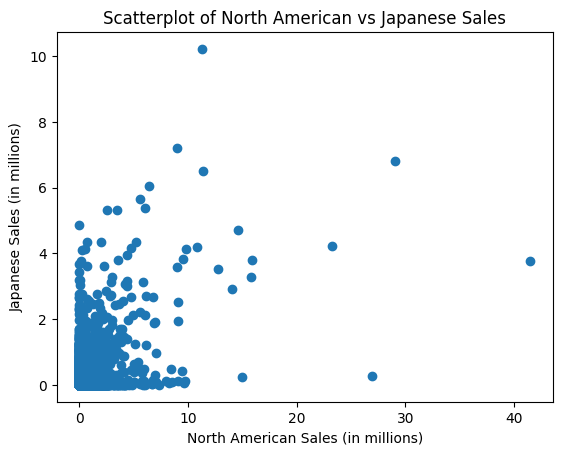

In [4]:
# Code for exercise 1.1
# Create a scatterplot here showing North American sales on the x axis and Japanese sales on the y axis.
# Add axis labels for the x and y axes, and add an appropriate title.

plt.scatter(data=vg_data, x="NA_Sales", y="JP_Sales")
plt.xlabel("North American Sales (in millions)")
plt.ylabel("Japanese Sales (in millions)")
plt.title("Scatterplot of North American vs Japanese Sales")
plt.show()

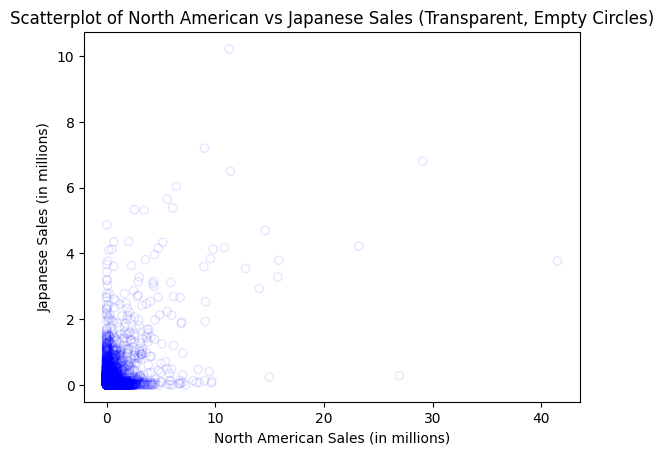

In [5]:
# Code for exercise 1.2
# Create a scatterplot here showing North American sales on the x axis and Japanese sales on the y axis.
# Add axis labels for the x and y axes, and add an appropriate title.
# Change the points of the scatterplot to have a transparency value of 0.1 and to be empty circles, rather than filled circles

plt.scatter(data=vg_data, x="NA_Sales", y="JP_Sales", alpha=0.1, marker='o', edgecolors='b', facecolors='none')
plt.xlabel("North American Sales (in millions)")
plt.ylabel("Japanese Sales (in millions)")
plt.title("Scatterplot of North American vs Japanese Sales (Transparent, Empty Circles)")
plt.show()

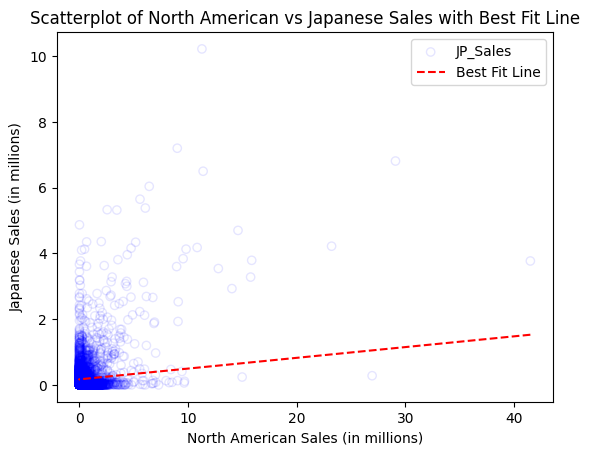

In [6]:
# Code for exercise 1.3
# Starting from the same plot as exercise 1.2, add a dotted line representing
# the linear fit of the two variables.  In matplotlib, you do this by drawing
# a line over the same plot, and then calling plt.show().  To 
# draw a line, you need to provide data corresponding to the linear fit.
# We have calculated this data - you just have to draw the line.
import numpy as np

# Update this scatterplot call with your scatterplot from exercise 1.2
plt.scatter(data=vg_data, x="NA_Sales", y="JP_Sales", alpha=0.1, marker='o', edgecolors='b', facecolors='none')
plt.xlabel("North American Sales (in millions)")
plt.ylabel("Japanese Sales (in millions)")
plt.title("Scatterplot of North American vs Japanese Sales with Best Fit Line")

# Next, we calculate the dataset for the best fit line
b, m = np.polyfit(vg_data["NA_Sales"], vg_data["JP_Sales"], deg=1)
xs = vg_data["NA_Sales"] # The x values for your line of best fit
ys = b + m * vg_data["NA_Sales"] # The y values for your line of best fit

# Next, you draw the line with that dataset.
plt.plot(xs, ys, color='r', linestyle='--', label="Best Fit Line")
plt.legend()

# Lastly, we tell pyplot to draw both the scatterplot and the line
plt.show()

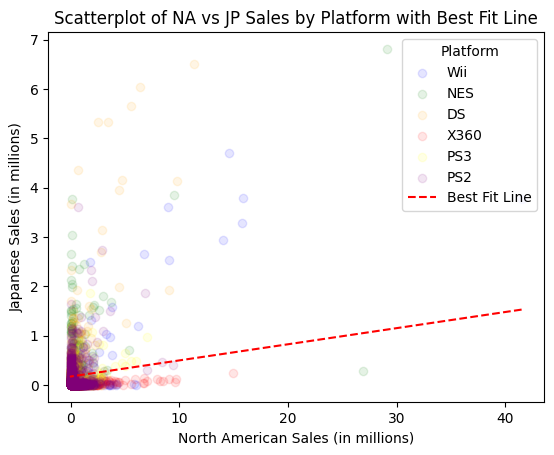

In [7]:
# Code for exercise 1.4
# Last step!  Build on exercise 1.4, except you should color the points
# in the scatterplot by the Platform variable.  
# Add a legend showing the point colors.

import numpy as np

# First, we will filter to only a subset of platforms, because there would be
# too many categories without filtering
filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

# Manually define colors for each platform
platforms = filtered_vg_data['Platform'].unique()  
colors = ['blue', 'green', 'orange', 'red', 'yellow', 'purple'] 
color_map = dict(zip(platforms, colors)) 

# Create scatter plot, with colors mapped to the 'Platform' column
for platform in platforms:
    platform_data = filtered_vg_data[filtered_vg_data['Platform'] == platform]
    plt.scatter(platform_data['NA_Sales'], platform_data['JP_Sales'], 
                alpha=0.1, label=platform, color=color_map[platform])


# Next, we calculate the dataset for the best fit line
b, m = np.polyfit(vg_data["NA_Sales"], vg_data["JP_Sales"], deg=1)
xs = vg_data["NA_Sales"] # The x values for your line of best fit
ys = b + m * vg_data["NA_Sales"] # The y values for your line of best fit

# Put your code to draw the line of best fit here
plt.plot(xs, ys, color='r', linestyle='--', label="Best Fit Line")

# Add labels and title
plt.xlabel("North American Sales (in millions)")
plt.ylabel("Japanese Sales (in millions)")
plt.title("Scatterplot of NA vs JP Sales by Platform with Best Fit Line")

# Add a legend showing platform colors
plt.legend(title="Platform")

# Lastly, we tell pyplot to draw both the scatterplot and the line
plt.show()

## Step 3: statistical visualizations with `seaborn`

Next, we are going to explore the same data with `seaborn`.  `seaborn` is designed with statistical analysis in mind.  We'll see what options it allows for our use case.  Throughout this step, please use the seaborn documentation ([https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)) to discover what is available in the library.

We'll start from a basic chart, again, as with the previous step.  We'll start you off with the colors already set to encode the Platform.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


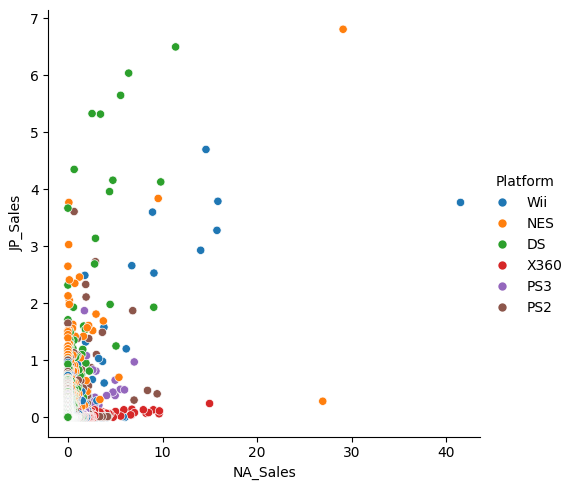

In [8]:
import seaborn as sns
filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

sns.relplot(
    data=filtered_vg_data,
    x="NA_Sales", y="JP_Sales", hue="Platform"
)


### Exercise 2

We want to improve on the seaborn plot above.  It looks pretty good - it is taking some steps to avoid overpainting, and it already has axes and a legend, automatically.  However, we still can't answer much about the relationships between the two variables.

**Take a screenshot after doing each of the prompts, and put them into a writeup document**.

1. Add a line of best fit *for each of the six categories*.  In `seaborn`, this is a built in functionality - you don't have to calculate the line of best fit.  Look at the documentation for `lmplot` ([https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)).  In particular, there is an example where a linear fit line is drawn for each of three groups.
2. The line of best fit rendering was easy to do, but it is fairly confusing to read.  Let's try a different technique to look at the distribution of the different platforms.  Continue to use `lmplot`, but this time, separate the different platforms into different small multiples.  Look at the examples at the bottom of the documentation for `lmplot`, linked above, for how to do this.  Write a few sentences in your writeup about these two methods of faceting the data - does one clarify the data for you?  Are any relationships becoming clear?
3. We'll try another plot type, called a `jointplot`, that is designed to compare two variables.  Look at the documentation for `jointplot`([https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets](https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets)) and render a jointplot for sales in North America and Japan, and color by Platform.  Write a few sentences in your writeup about this plot - does it reveal anything to you?
4. It's hard to compare the distributions of our two variables because they are highly [skewed](https://en.wikipedia.org/wiki/Skewness) towards the origin.  One trick we can try is changing the scale of the axes to a log scale - this provides more of the axes on the lower numbers by plotting the log of the x and log of the y variables.  Recreate your `lmplot` and `jointplot`, but add the command `plt.xscale('log')`, and `plt.yscale('log')` at the end of your code.  Write a few sentenes in your writeup about adding the log scale - does it help you identify any trends?
5. Look through the seaborn documentation to find a chart type that we haven't used yet, and try to find configuration options that make it easier to analyze this data.  Explain in your writeup why you chose that chart and those options, and how it leads to some insight about the data.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


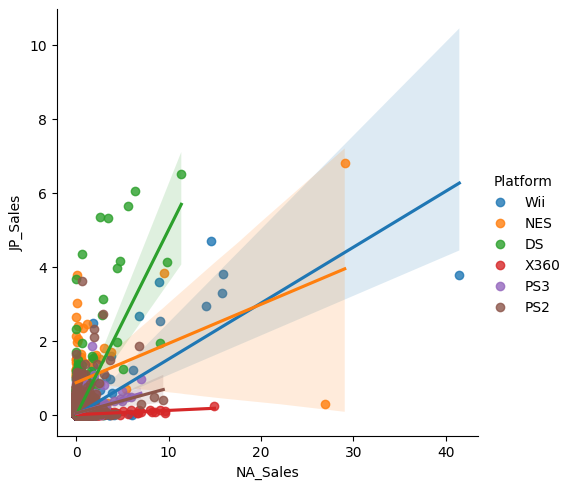

In [9]:
# Exercise 2.1
# Use lmplot to analyze our data, having lines of best fit for the top six platforms in the data.

filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

sns.lmplot(
    data=filtered_vg_data,
    x="NA_Sales", 
    y="JP_Sales", 
    hue="Platform", 
)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


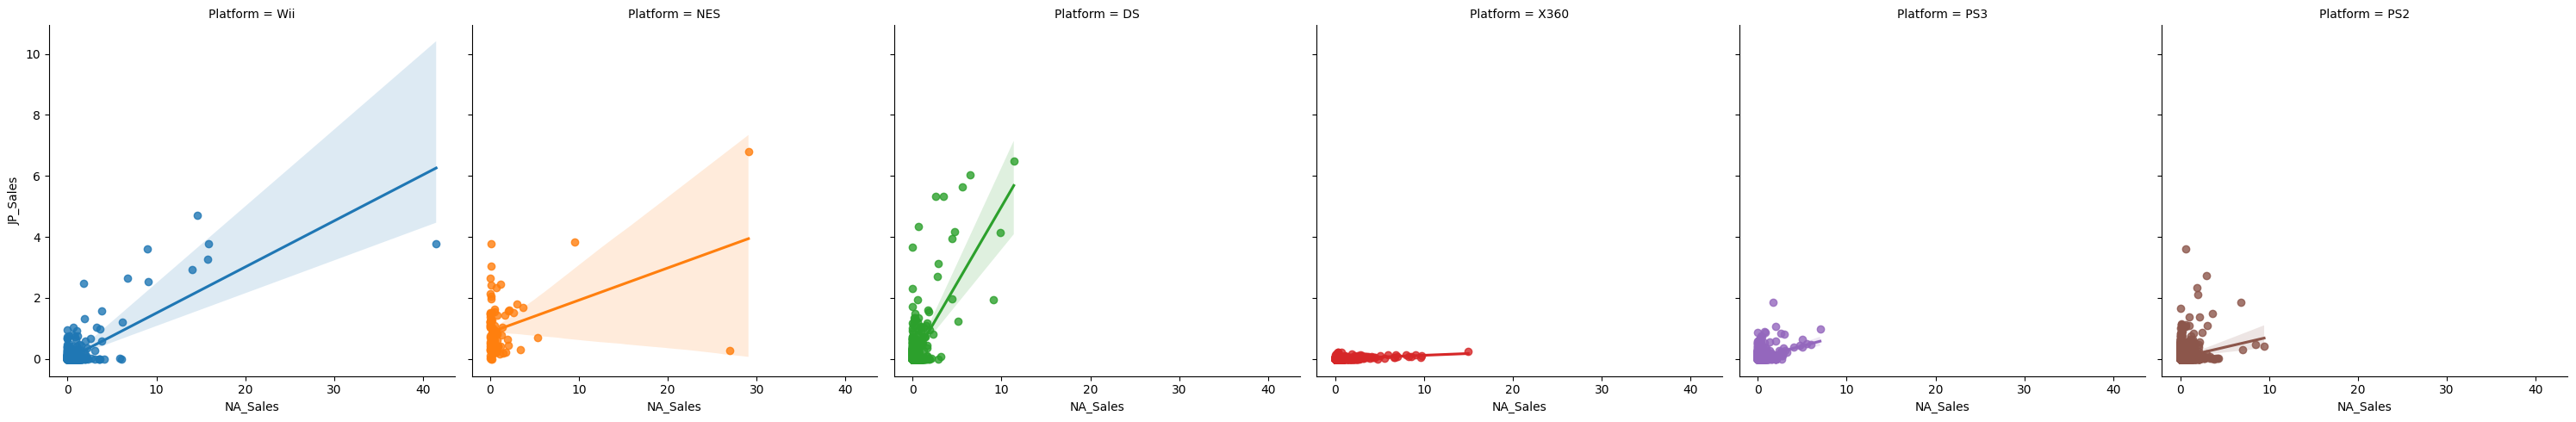

In [10]:
# Exercise 2.2
# Split out lmplot into six different plots, one for each of the six platforms in the data.

filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

sns.lmplot(
    data=filtered_vg_data,
    x="NA_Sales", 
    y="JP_Sales", 
    hue="Platform",
    col="Platform"
)

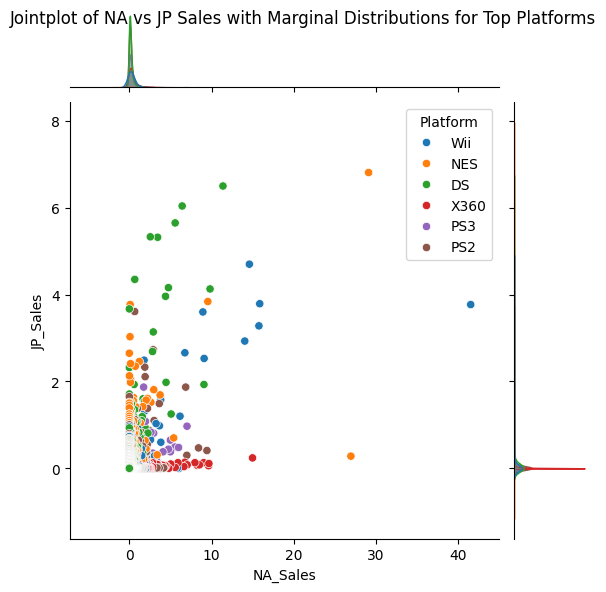

In [11]:
# Exercise 2.3
# Use jointplot to analyze our data, comparing the marginal distributions for the top six platforms in the data.

filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

sns.jointplot(
    data=filtered_vg_data,
    x="NA_Sales", 
    y="JP_Sales",
    hue="Platform",
)

plt.suptitle("Jointplot of NA vs JP Sales with Marginal Distributions for Top Platforms")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


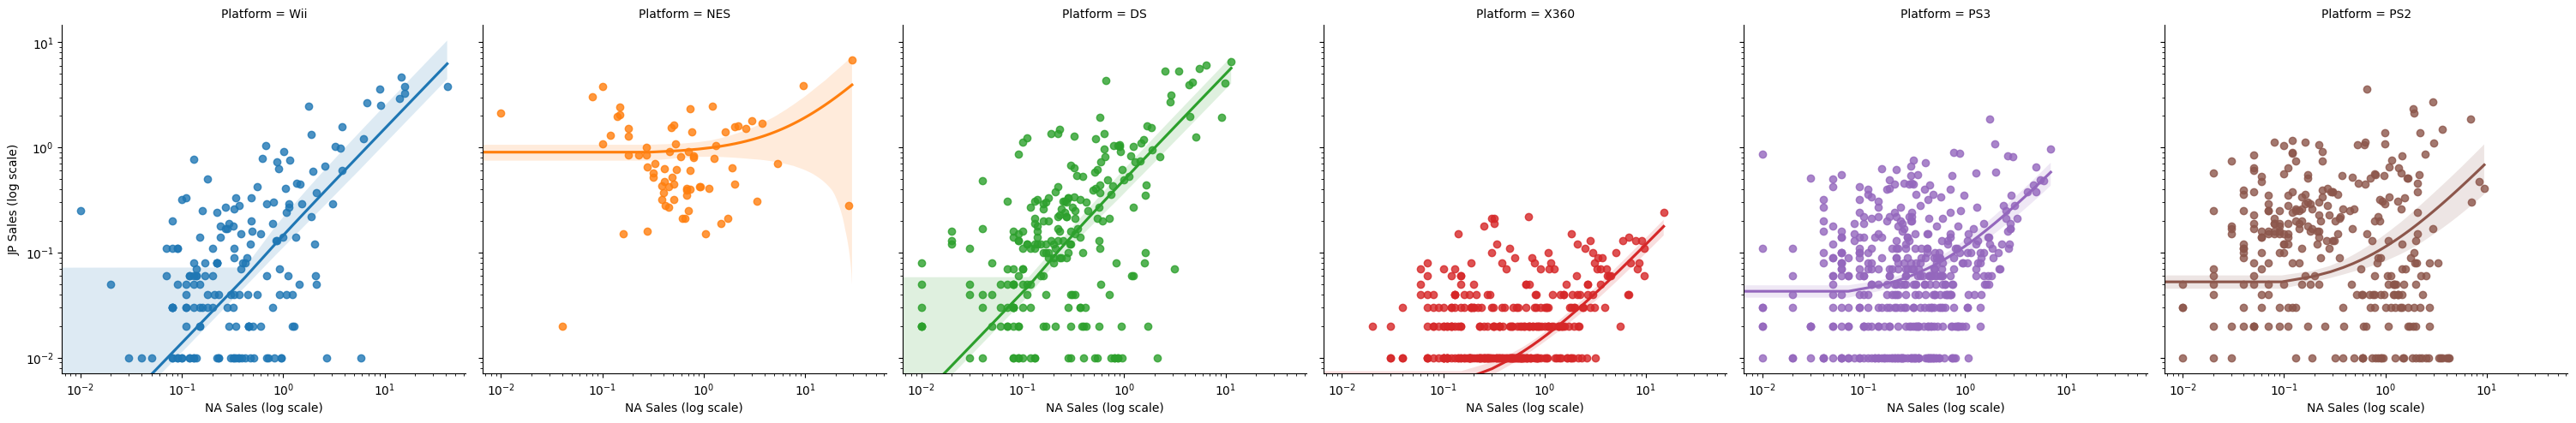

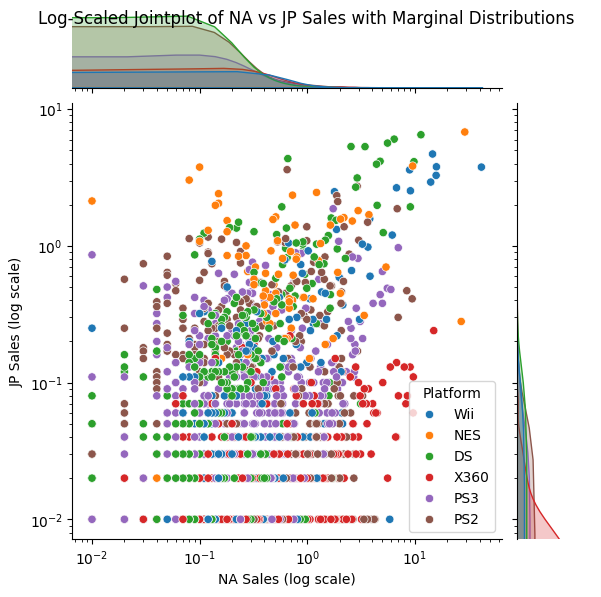

In [12]:
# Exercise 2.4
# Generate the lmplot and jointplot again, but this time with log scales.

#Lmplot
filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

l = sns.lmplot(
    data=filtered_vg_data,
    x="NA_Sales", 
    y="JP_Sales", 
    hue="Platform",
    col="Platform",
)

l.set(xscale="log", yscale="log")

l.set_axis_labels("NA Sales (log scale)", "JP Sales (log scale)")

plt.show()




#Jointplot
j = sns.jointplot(
    data=filtered_vg_data,
    x="NA_Sales", 
    y="JP_Sales",
    hue="Platform",
)

j.ax_joint.set_xscale('log')
j.ax_joint.set_yscale('log')

j.set_axis_labels("NA Sales (log scale)", "JP Sales (log scale)")

plt.suptitle("Log-Scaled Jointplot of NA vs JP Sales with Marginal Distributions")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


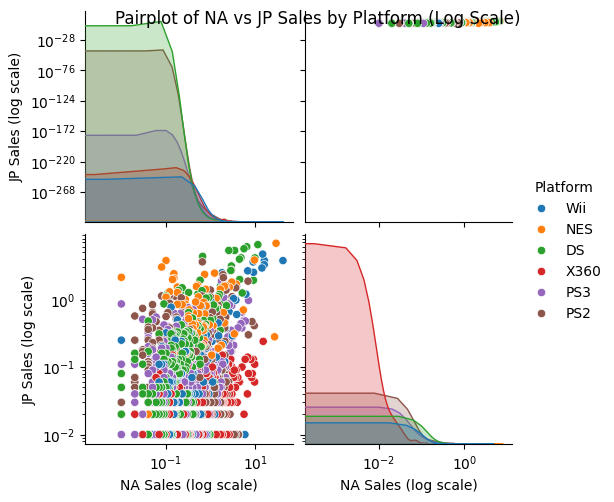

In [13]:
# Exercise 2.5
# Use a different type of plot, and try to find the best configuration options to analyze the data.

filtered_vg_data = vg_data[vg_data.Platform.isin(['Wii', 'NES', 'DS', 'PS2', 'PS3', 'X360'])]

g = sns.pairplot(
    data=filtered_vg_data,
    hue="Platform", 
    vars=["NA_Sales", "JP_Sales"], 
)

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("NA Sales (log scale)")
    ax.set_ylabel("JP Sales (log scale)")

plt.suptitle("Pairplot of NA vs JP Sales by Platform (Log Scale)")

plt.show()

## Step 4: interactive visualizations with `altair`

Next, we are going to explore the same data with `altair`.  `altair` can generate interactive visualizations very easily.  As with previous steps, please use the seaborn documentation ([https://altair-viz.github.io/getting_started/starting.html](https://altair-viz.github.io/getting_started/starting.html)) to discover what is available in the library.

We will create you a basic comparison plot, with a normal scale on both axes.  Note that altair is not designed for visualizing large numbers of points, so we will subsample our data down to 500 points.

Another note - ignore any warnings about the `convert_dtype` parameter being deprecated - that is from `altair` internals and isn't any indication of us doing anything wrong.

In [18]:
import altair as alt
##

sampled_vg_data = filtered_vg_data.sample(n=500, random_state=42)

alt.Chart(sampled_vg_data).mark_point().encode(
    x='NA_Sales',
    y='JP_Sales'
)

alt.Chart(...)

### Exercise 3

Here, we're going to take advantage of the ability of `altair` to create interactive visualizations.  

**Take a screenshot after doing each of the prompts, and put them into a writeup document**.

1. First, look at the example of an interactive scatterplot at ([https://altair-viz.github.io/gallery/scatter_tooltips.html](https://altair-viz.github.io/gallery/scatter_tooltips.html)).  Implement all three features you see there - add color based on platform, add a tooltip, and call `.interactive()`.  What types of analysis can you do now with the tooltips and interactivity?
2. Next, recreate a much more complicated interactive chart, found at ([https://altair-viz.github.io/gallery/interactive_cross_highlight.html](https://altair-viz.github.io/gallery/interactive_cross_highlight.html)).  You will need to adapt the code in that example to use our data.  You can use it to show the count of units sold per Platform, and let the user select a different heatmap for each Platform.  Try to figure out how to use a log scale, so that you can see more of the data in those regions.  In your writeup, describe this interactive plot - what is the visual encoding, in terms of marks and channels?  **Be aware that the example for altair is based on Altair version 5 - if you have an earlier version of Altair installed, please mkae sure you are looking at the documentation for the correct version**.
3. Write a one paragraph reflection about Altair - when do you think it is useful, compared to the previous two packages?

In [21]:
# Exercise 3.1
# Update this code to make the chart use color, have tooltips, and be interactive.

alt.Chart(sampled_vg_data).mark_point().encode(
    x='NA_Sales',
    y='JP_Sales',
    color='Platform', 
    tooltip=['NA_Sales', 'JP_Sales', 'Platform']  
).interactive() 

alt.Chart(...)

In [22]:
# Exercise 3.2
# Using the example at https://altair-viz.github.io/gallery/interactive_cross_highlight.html, create an interactive cross highlight chart.

# IN LOG SCALE (NOT INTERACTIVE)

import altair as alt

sampled_vg_data = filtered_vg_data[(filtered_vg_data['NA_Sales'] > 0) & 
                                   (filtered_vg_data['JP_Sales'] > 0)]
sampled_vg_data = sampled_vg_data.dropna(subset=['NA_Sales', 'JP_Sales'])

selection = alt.selection_point(encodings=['x'])

rect = alt.Chart(sampled_vg_data).mark_rect().encode(
    alt.X('NA_Sales:Q', scale=alt.Scale(type='log'), title='NA Sales (log scale, in millions)'),
    alt.Y('JP_Sales:Q', scale=alt.Scale(type='log'), title='JP Sales (log scale, in millions)'),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue', domain=[1, 50]), legend=alt.Legend(title='Total Records'))
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()', legend=alt.Legend(title='Records in Selection'))
).transform_filter(
    selection
)

bar = alt.Chart(sampled_vg_data).mark_bar().encode(
    x='Platform:N',
    y='count()',
    color=alt.condition(selection, alt.ColorValue('steelblue'), alt.ColorValue('grey'))
).properties(
    width=550,
    height=200
).add_params(
    selection
)

chart = alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color='independent',
    size='independent'
)

chart



alt.VConcatChart(...)

In [23]:
# NOT IN LOG SCALE (INTERACTIVE)

import altair as alt

pts = alt.selection_point(encodings=['x'])  

rect = alt.Chart(sampled_vg_data).mark_rect().encode(
    alt.X('NA_Sales:Q', bin=True), 
    alt.Y('JP_Sales:Q', bin=True), 
    alt.Color('count()').scale(scheme='greenblue').title('Total Records'), 
).add_selection(pts)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()').title('Records in Selection')
).transform_filter(
    pts
)

bar = alt.Chart(sampled_vg_data).mark_bar().encode(
    x='Platform:N',  
    y='count()',     
    color=alt.condition(pts, alt.ColorValue('steelblue'), alt.ColorValue('grey'))  
).properties(
    width=550,
    height=200
).add_params(pts)


alt.vconcat(
    rect + circ,  
    bar           
).resolve_legend(
    color="independent",
    size="independent"
)


/var/folders/nt/gx_mcyh13dg6pcswt3ccs7nr0000gn/T/ipykernel_8810/4221266521.py:11: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(pts)


alt.VConcatChart(...)